In [18]:
# !python3 -m pip install --upgrade pip
# !python3 -m pip install numpy matplotlib pymssql
!python3 -m pip install pyuff

642.48s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 KB 587.3 kB/s eta 0:00:00 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.6/323.6 KB 7.8 MB/s eta 0:00:0000:01
  Using cached tomli-2.0.1-py3-none-any.whl (12 kB)


In [4]:
import matplotlib.pyplot as plt
import pymssql as mssql
import numpy as np
import struct

In [5]:
uff_file = pyuff.UFF('ObserverODSExport.uff')
data = uff_file.read_sets()


NameError: name 'pyuff' is not defined

In [6]:
print(data)
print(data.keys())
print(len(data['x']))
print(len(data['data']))


NameError: name 'data' is not defined

In [8]:
# url = 'DESKTOP-AKLQCEN'
url = '59.28.91.19:1433'
username='sa'
password='skf1234!'
database='Hangwon4'

In [9]:
# conn = mssql.connect(server = 'DESKTOP-AKLQCEN',  database = 'WTGSU113_Prototype_Beaksu_20170224')
conn = mssql.connect(server=url, user=username, password=password, database=database)
cursor = conn.cursor() # 쿼리 생성과 결과 조회를 위해 사용


In [10]:
def convertData(row, scaleFactor):
    result = []
    width = 2

    for idx in range(0, len(row), width):
        raw = row[idx:idx+width]
        # if r == True:
            # data = float(struct.unpack('>h', raw)[0])
        # else:
        data = float(struct.unpack('<h', raw)[0])
            
        result.append(data * scaleFactor)
    return np.array(result)

In [11]:
cursor.execute('SELECT *  FROM MeasurementBinaryRaw WHERE IDMeasurement=778096')

result = []

row = cursor.fetchone() # 쿼리 결과의 다음 행을 가져와 리턴
tmp1 = convertData(row[4], row[3])
print(len(row[4]))
print()
print()

# Phase Data
row = cursor.fetchone() # 쿼리 결과의 다음 행을 가져와 리턴
print(len(row[4]))
tmp3 = convertData(row[4], row[3])

# RealData
row = cursor.fetchone() # 쿼리 결과의 다음 행을 가져와 리턴
print(len(row[4]))
tmp5 = convertData(row[4], row[3])

3200


3200
8192


4096
0.00016301556085807078


C:\Users\ChaCha\AppData\Local\Temp\ipykernel_3724\3337992425.py:13: ComplexWarning: Casting complex values to real discards the imaginary part
  y = np.fft.rfft(data).astype('float32') / len(data)


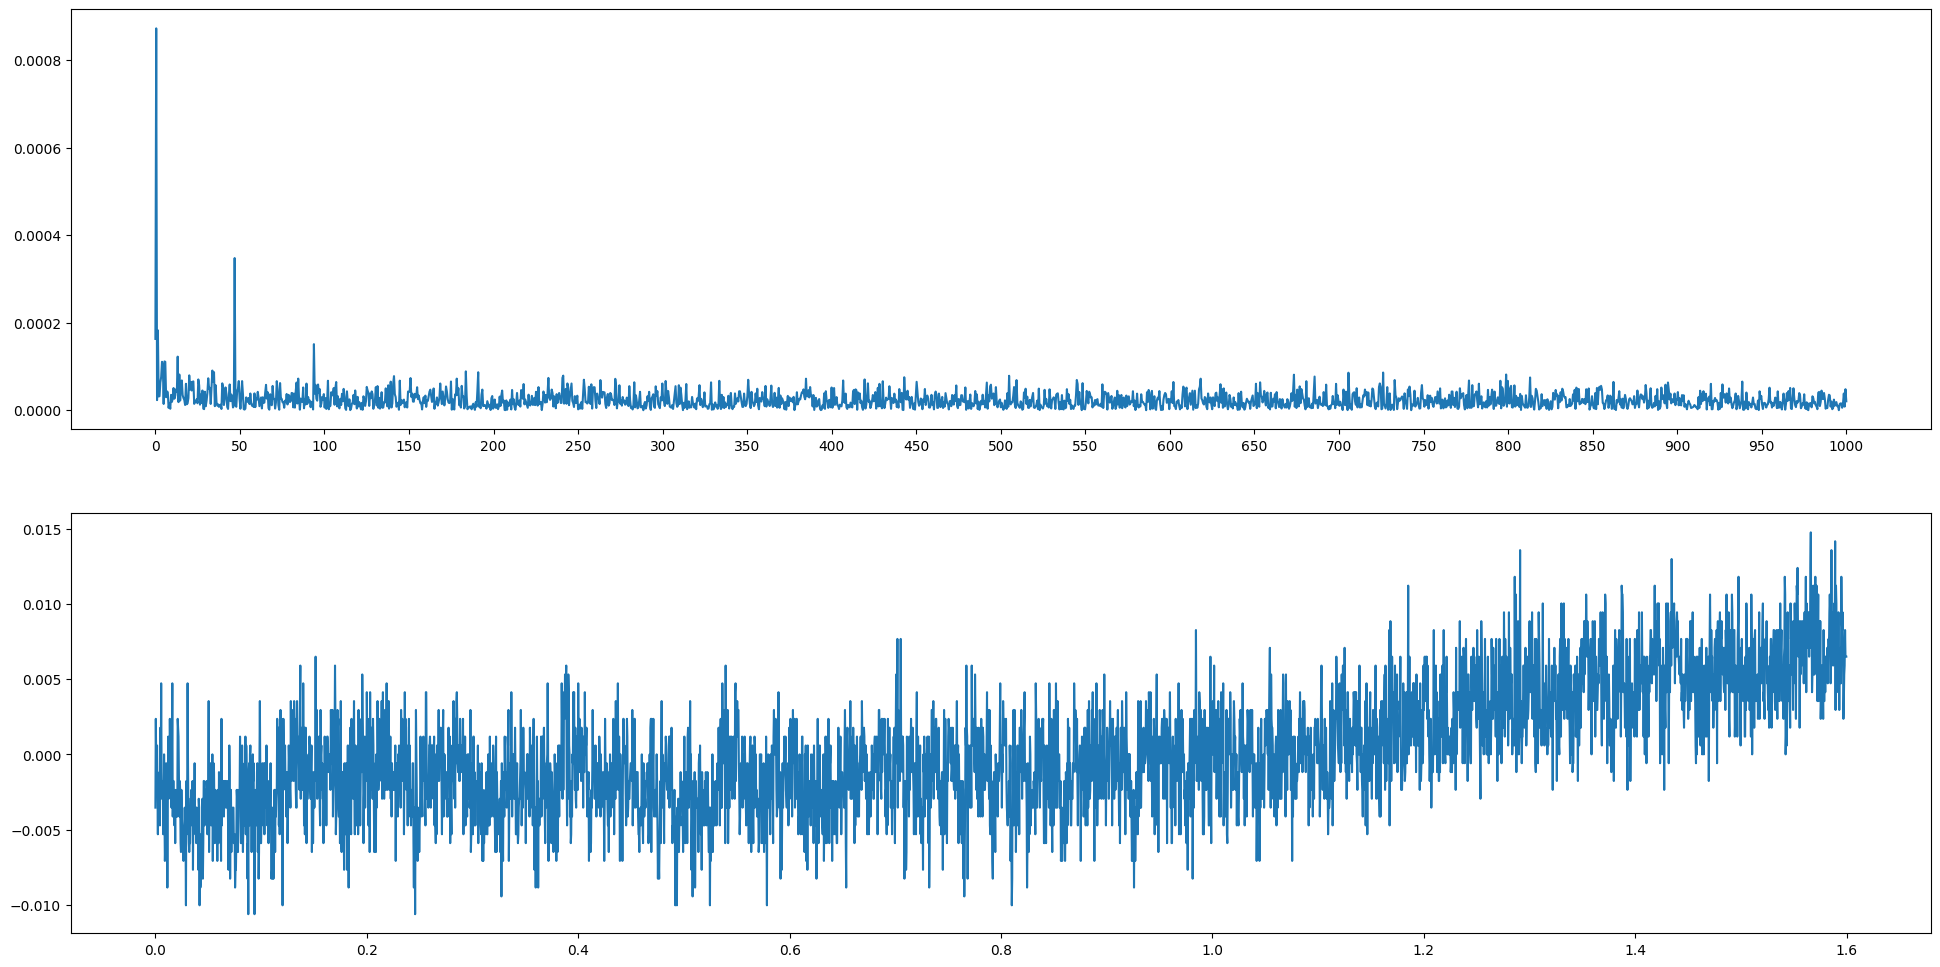

<Figure size 2400x600 with 0 Axes>

In [12]:
# a = [tmp1,tmp2, tmp3,tmp4,tmp5,tmp6]
a = [tmp5]


for item in a:
    print(len(item))
    plt.figure(figsize=(24,12))
    plt.subplot(2, 1, 1)
    print(item.mean())
    # data = item - item.mean()
    data = item
    x = np.fft.rfftfreq(len(data), 1/2000)
    y = np.fft.rfft(data).astype('float32') / len(data)
    z = np.abs(y)
    plt.plot(x, z)
    
    plt.xticks(np.arange(0,1001, 50))
    plt.subplot(2, 1, 2)
    plt.plot(np.arange(len(item)) / 2560, item)
    plt.show()
    plt.figure(figsize=(24,6)) 

